In [1]:
# Vorgehen nach Box-Jenkins Methode
import numpy as np
from pandas import read_csv
import pandas as pd
from pandas import datetime
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import math as m

C:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
DATA_FILE="Dropbox/Masterarbeit/Masterarbeit/Datensätze/Geburtenrate/Datensatz.xlsx"
df=pd.read_excel(DATA_FILE, header=0, parse_dates=[0], index_col='Jahr-Monat',squeeze=True)

# Ein array mit allen Einträgen --> zur besseren Weiterverarbeitung
ts=df.values
ZR=ts[-400:]

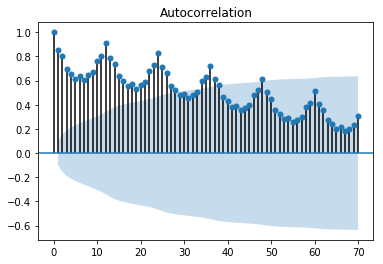

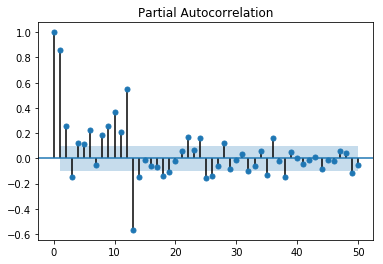

In [3]:
plot_acf(ZR,lags=70)
pyplot.show()

plot_pacf(ZR, lags=50)
pyplot.show()

In [3]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)

# invert differenced value
def inverse_diff(history, yhat, interval):
    equal=list()
    for i in range(len(yhat)):
        value= yhat[i]+history[i]
        equal.append(value)
    return np.array(equal)

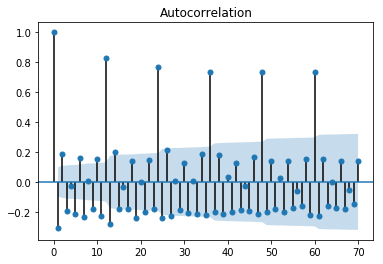

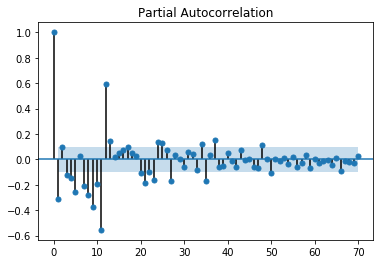

In [4]:
# Transformtion der Daten, da Saisonalität und Non-Stationarity vorhanden
# 1. log
ZR_log=np.log(ZR)

# 1.1 difference = 1
ZR_log_diff_1=difference(ZR_log,1)

# plot
plot_acf(ZR_log_diff_1,lags=70)
plot_pacf(ZR_log_diff_1,lags=70)
pyplot.show()

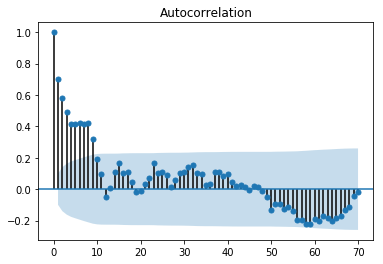

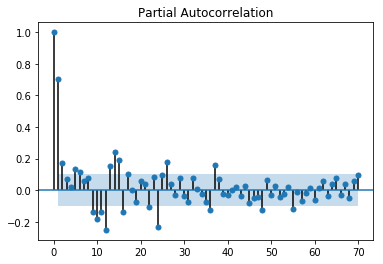

In [5]:
# 1.2 difference = 12
ZR_log_diff_12=difference(ZR_log,12)
plot_acf(ZR_log_diff_12,lags=70)
plot_pacf(ZR_log_diff_12,lags=70)
pyplot.show()

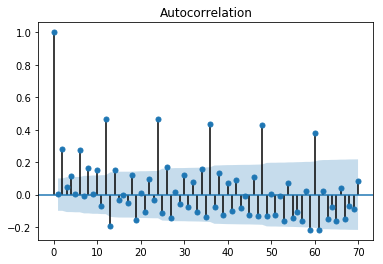

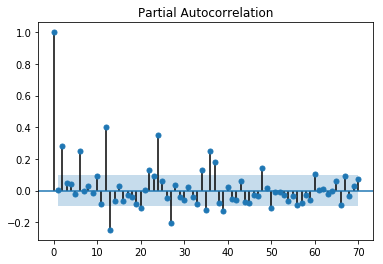

In [7]:
# 1.3: 1.1+1.2
ZR_log_diff=difference(ZR_log,12)+difference(ZR_log[:388],1)
plot_acf(ZR_log_diff,lags=70)
plot_pacf(ZR_log_diff,lags=70)
pyplot.show()

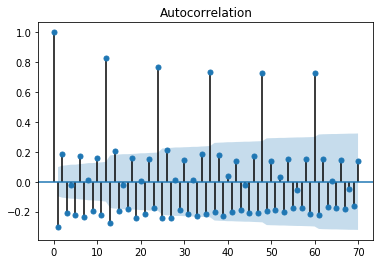

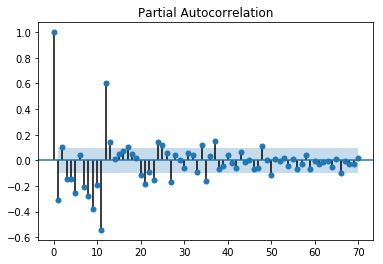

In [8]:
# Transformtion der Daten:
# 2. sqr
ZR_sqrt =np.sqrt(ZR)

#2.1 difference 1
ZR_sqrt_diff_1=difference(ZR_sqrt,1)
plot_acf(ZR_sqrt_diff_1,lags=70)
plot_pacf(ZR_sqrt_diff_1,lags=70)
pyplot.show()

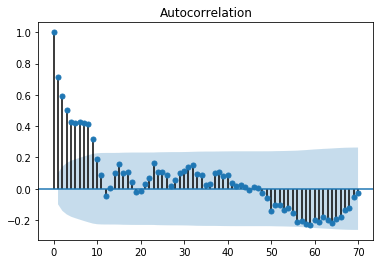

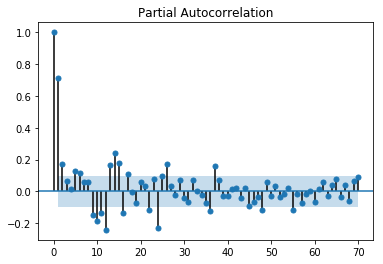

In [9]:
# 2.2 difference = 12
ZR_sqrt_diff_12=difference(ZR_sqrt,12)
plot_acf(ZR_sqrt_diff_12,lags=70)
plot_pacf(ZR_sqrt_diff_12,lags=70)
pyplot.show()

In [11]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(ZR_log_diff_12, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -3.226372
p-value                          0.018508
#Lags Used                      16.000000
Number of Observations Used    370.000000
dtype: float64


In [12]:
kpssoutput_c=kpss(ZR_log_diff_12,regression='c')
print(kpssoutput_c)

(0.307414370905234, 0.1, 17, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


C:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [6]:
# Modell anpassen: unterschiedliche Ordnungen testen
ZR_log_diff_f = ZR_log_diff_12 * 1.0
model = ARIMA(ZR_log_diff_f, order=(1,0,1))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  388
Model:                     ARMA(1, 1)   Log Likelihood                 829.721
Method:                       css-mle   S.D. of innovations              0.028
Date:                Wed, 05 Sep 2018   AIC                          -1651.442
Time:                        16:28:48   BIC                          -1635.598
Sample:                             0   HQIC                         -1645.160
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0021      0.007     -0.325      0.745      -0.015       0.011
ar.L1.y        0.8467      0.040     21.275      0.000       0.769       0.925
ma.L1.y       -0.2984      0.077     -3.866      0.0

In [14]:
model = ARIMA(ZR_log_diff_f, order=(1,0,9))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  387
Model:                     ARMA(1, 9)   Log Likelihood                 862.410
Method:                       css-mle   S.D. of innovations              0.026
Date:                Wed, 22 Aug 2018   AIC                          -1700.820
Time:                        10:19:23   BIC                          -1653.319
Sample:                             0   HQIC                         -1681.985
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0017      0.007     -0.253      0.800      -0.015       0.012
ar.L1.y        0.4810      0.076      6.356      0.000       0.333       0.629
ma.L1.y       -0.0632      0.082     -0.772      0.4

In [15]:
model = ARIMA(ZR_log_diff_f, order=(1,0,3))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  387
Model:                     ARMA(1, 3)   Log Likelihood                 829.613
Method:                       css-mle   S.D. of innovations              0.028
Date:                Wed, 22 Aug 2018   AIC                          -1647.226
Time:                        10:20:46   BIC                          -1623.476
Sample:                             0   HQIC                         -1637.809
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0019      0.008     -0.249      0.804      -0.017       0.013
ar.L1.y        0.9080      0.033     27.134      0.000       0.842       0.974
ma.L1.y       -0.3622      0.062     -5.820      0.0

In [17]:
model = ARIMA(ZR_log_diff_f, order=(13,0,1))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  387
Model:                    ARMA(13, 1)   Log Likelihood                 879.860
Method:                       css-mle   S.D. of innovations              0.025
Date:                Wed, 22 Aug 2018   AIC                          -1727.720
Time:                        10:23:02   BIC                          -1664.385
Sample:                             0   HQIC                         -1702.606
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0010      0.008     -0.129      0.897      -0.017       0.015
ar.L1.y        1.1256      0.088     12.851      0.000       0.954       1.297
ar.L2.y       -0.1644      0.080     -2.049      0.0

In [18]:
model = ARIMA(ZR_log_diff_f, order=(13,0,3))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  387
Model:                    ARMA(13, 3)   Log Likelihood                 891.601
Method:                       css-mle   S.D. of innovations              0.024
Date:                Wed, 22 Aug 2018   AIC                          -1747.202
Time:                        10:24:31   BIC                          -1675.950
Sample:                             0   HQIC                         -1718.949
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0023      0.006     -0.396      0.692      -0.013       0.009
ar.L1.y        0.4344      0.067      6.462      0.000       0.303       0.566
ar.L2.y        0.1950      0.061      3.212      0.0

In [7]:
# Vorhersage
# 0. Einteilen der transformierten Daten in Trainings-und Testdaten
# Transformierte Daten
length=int(len(ZR_log_diff_12)/2)
ZR_TR_P, ZR_TE_P= ZR_log_diff_f[0:length], ZR_log_diff_f[length:len(ZR_log_diff_f)]
ZR_TR_log, ZR_TE_log= ZR_log[0:length], ZR_log[length:len(ZR_log)]

# original Daten
# ZR abschneiden, da Differenzierung Datensatz verkleinert 
ZR_S=ZR[12:]
ZR_TR_S, ZR_TE_S= ZR_S[0:length], ZR_S[length:len(ZR)]

# ZR lassen, fürs re-processing
ZR_TR, ZR_TE=ZR[0:250], ZR[250:len(ZR)]

In [13]:
# 1. Modell anpassen für Inputgröße von 250 Datenpunkte
model=ARIMA(ZR_TR_P, order=(1,0,9))
model_fit=model.fit(disp=0)

print(model_fit.summary())

C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  194
Model:                     ARMA(1, 9)   Log Likelihood                 432.820
Method:                       css-mle   S.D. of innovations              0.025
Date:                Sun, 26 Aug 2018   AIC                           -841.640
Time:                        16:34:59   BIC                           -802.425
Sample:                             0   HQIC                          -825.761
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0062      0.008     -0.827      0.409      -0.021       0.009
ar.L1.y       -0.6647      0.071     -9.348      0.000      -0.804      -0.525
ma.L1.y        1.3379      0.088     15.262      0.0

C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


predicted=-0.039479, expected=-0.029325
predicted=-0.039479, expected=-0.025932
predicted=-0.039479, expected=-0.057396
predicted=-0.039479, expected=-0.049774
predicted=-0.039479, expected=0.004027
predicted=-0.039479, expected=-0.000246
predicted=-0.039479, expected=-0.015695
predicted=-0.039479, expected=-0.071239
predicted=-0.039479, expected=-0.038709
predicted=-0.039479, expected=-0.019566
predicted=-0.039479, expected=-0.030659
predicted=-0.039479, expected=0.004723
predicted=-0.039479, expected=0.001062
predicted=-0.039479, expected=-0.032603
predicted=-0.039479, expected=-0.000017
predicted=-0.039479, expected=-0.028764
predicted=-0.039479, expected=-0.040697
predicted=-0.039479, expected=-0.059282
predicted=-0.039479, expected=-0.016191
predicted=-0.039479, expected=0.006264
predicted=-0.039479, expected=0.002166
predicted=-0.039479, expected=0.013415
predicted=-0.039479, expected=-0.011609
predicted=-0.039479, expected=0.003131
predicted=-0.039479, expected=-0.035715
predict

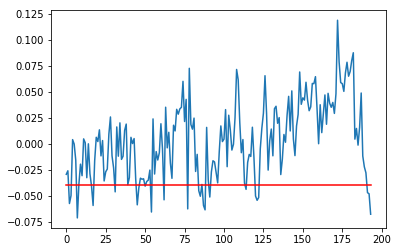

In [8]:
# 2. Vorhersage
# 2.1 t+1 
history = [x for x in ZR_TR_P]
model = ARIMA(history, order=(1,0,1))
model_fit = model.fit(disp=0)
predictions = list()
for t in range(len(ZR_TE_P)):
    model = ARIMA(history, order=(1,0,1))
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = ZR_TE_P[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(ZR_TE_P, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(ZR_TE_P)
pyplot.plot(predictions, color='red')
pyplot.show()

C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Test MSE: 0.001


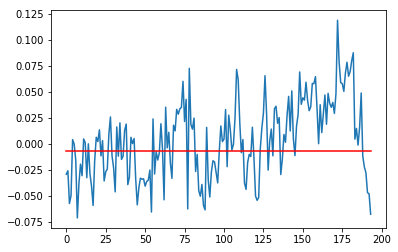

In [48]:
# 2.2 t+60
lag=60
history = [x for x in ZR_TR_P]
model = ARIMA(history, order=(1,0,1))
model_fit = model.fit(disp=0)
predictions_60 = list()
for t in range(len(ZR_TE_P)):
    model = ARIMA(history, order=(1,0,1))
    output = model_fit.forecast(steps=lag)
    yhat = output[0]
    predictions_60.append(yhat)
    obs = ZR_TE_P[t]
    history.append(obs)
    
# 60er Input je array von Interesse
predictions_6=[0]*len(predictions_60)
for t in range(len(predictions_6)):
    predictions_6[t]=predictions_60[t][lag-1]
    

error = mean_squared_error(ZR_TE_P, predictions_6)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(ZR_TE_P)
pyplot.plot(predictions_6, color='red')
pyplot.show()

In [9]:
# 3. Re-preprocessing
# 3.1 t+1
# invert differenced value
predictions=inverse_diff(ZR_TE_log,predictions, 12)

# invert log
predictions=np.exp(predictions)

In [50]:
# invert differenced value
# 3.2 t+60
predictions_60=inverse_diff(ZR_TE_log,predictions_6, 12)

# invert log
predictions_60=np.exp(predictions_60)

10823998.89230068


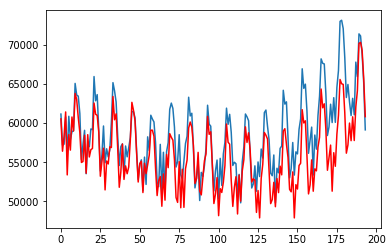

In [10]:
# 4. Modell bewerten: MSE 
# 4.1 t+1
error= mean_squared_error(ZR_TE_S,predictions)
print(error)
test=ZR_TE_S
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

5139088.403235262


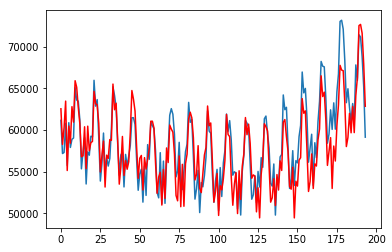

In [51]:
# 4.2 t+60 
error= mean_squared_error(ZR_TE_S,predictions_60)
print(error)
test=ZR_TE_S
pyplot.plot(test)
pyplot.plot(predictions_60, color='red')
pyplot.show()